In [1]:
'''
This notebook contains code to analyse how well the training of the network went and produce plots.
'''

'\nThis notebook contains code to analyse how well the training of the network went and produce plots.\n'

In [2]:
#Importing necessary libraries
import numpy as np
# from keras.layers import Input, Dense, Dropout
# from keras.models import Model, Sequential
# from keras.callbacks import EarlyStopping, TensorBoard
# from keras import optimizers
# from keras import backend as K
# import keras

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import metrics

import math
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib notebook

import string
plt.rc('text', usetex=False)

import pickle

from Autoencoder_Utils import *
from __future__ import print_function

/opt/conda/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
#Load Output from Neural Network training
TYPE = "" # 100% of the data. To determine the real performance of the cross check
#TYPE = "_10perc" #10% of the data. Used for everything except to determine the real performance of the cross check
#TYPE = "_1perc" #1% of the data. For small tests.
#TYPE = "_100" #100 samples of the data. For very rudimentary tests

pids = ['a', 'b', 'c', 'd', 'e']

retain_dict = pickle.load( open( "retain_dict_{}.p".format(TYPE), "rb" ) )
all_input = retain_dict.pop("test_input")
all_input_dec = retain_dict.pop("test_input_dec")
all_aux = retain_dict.pop("test_aux")
all_MC = retain_dict.pop("test_MC")
l_score = retain_dict.pop("l_score")
all_decoded_dict = retain_dict.pop("save_decoded_dict")
all_decoded_dict_dec = retain_dict.pop("save_decoded_dict_dec")
vars_list_input = retain_dict.pop("vars_list_input")

l_encoding_dim = all_decoded_dict.keys()

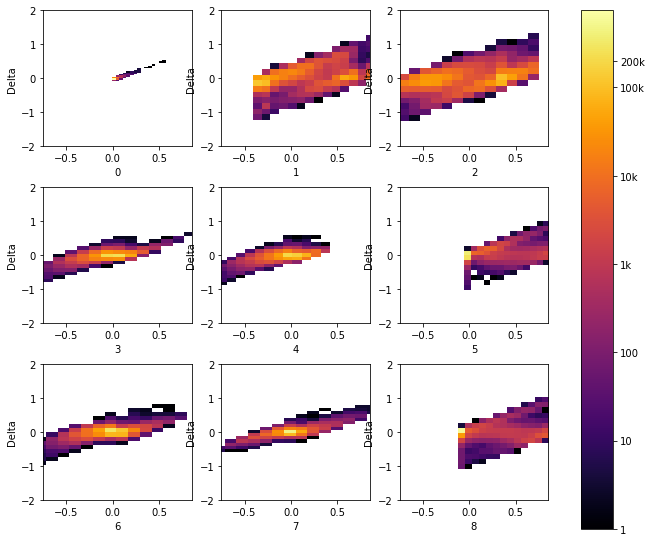

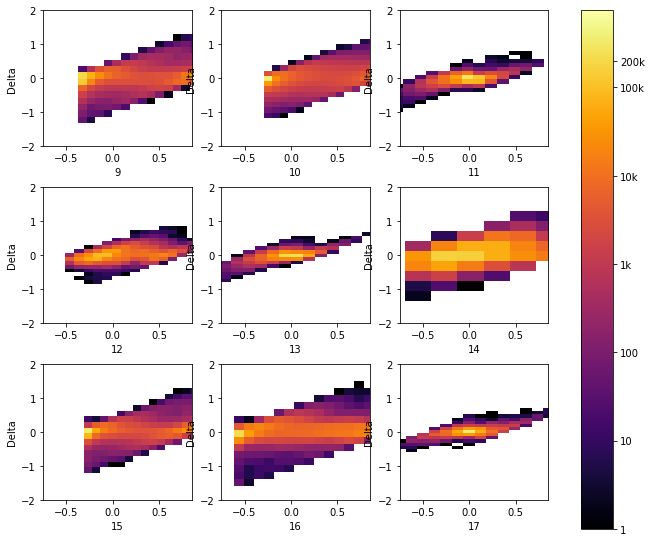

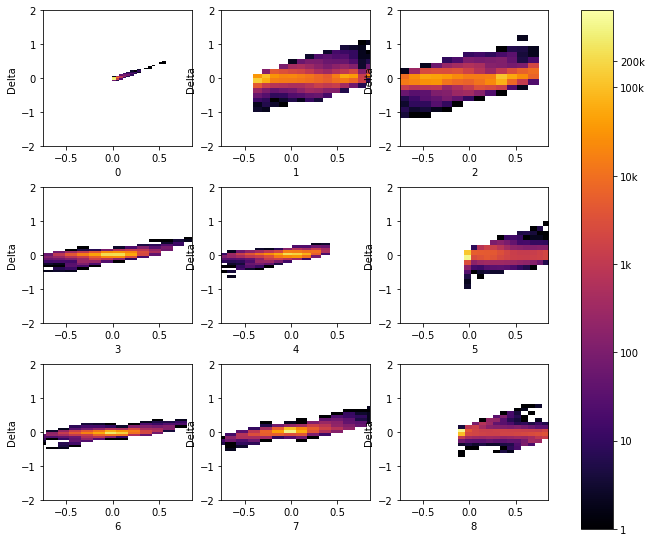

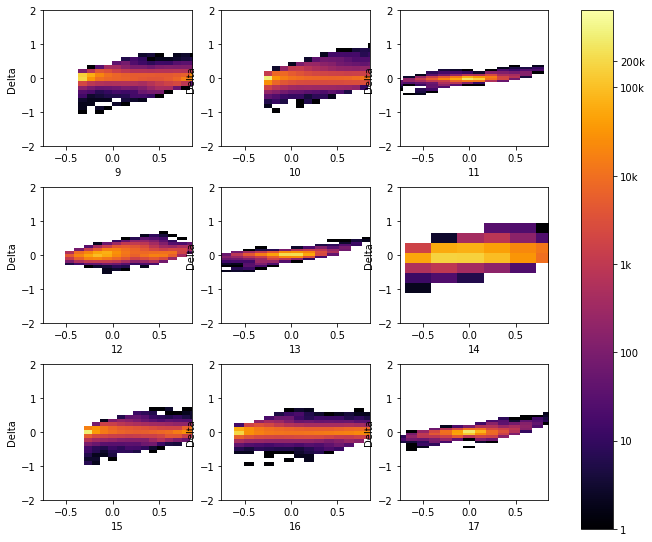

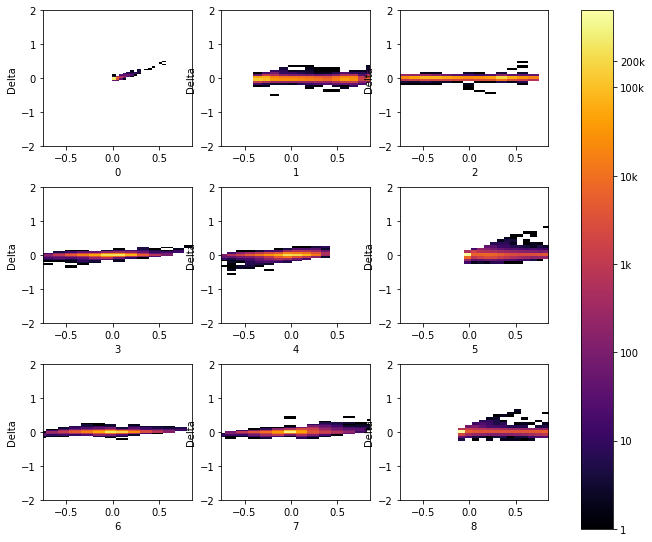

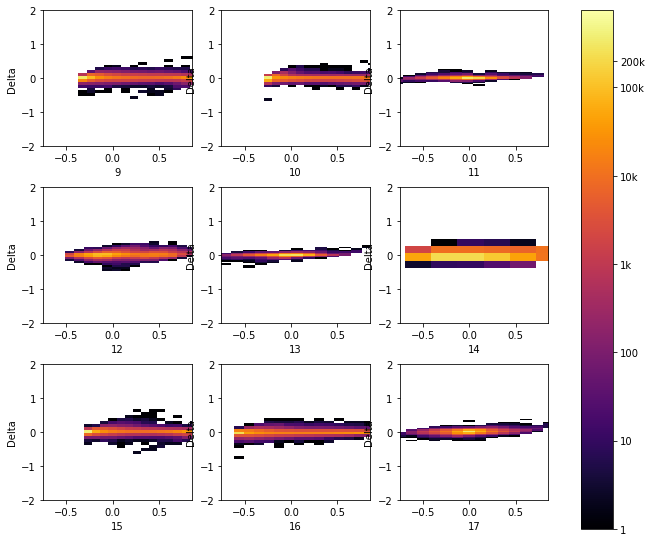

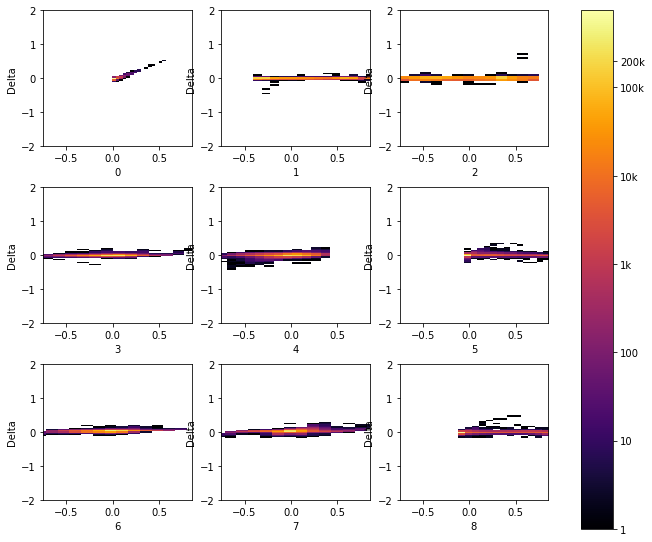

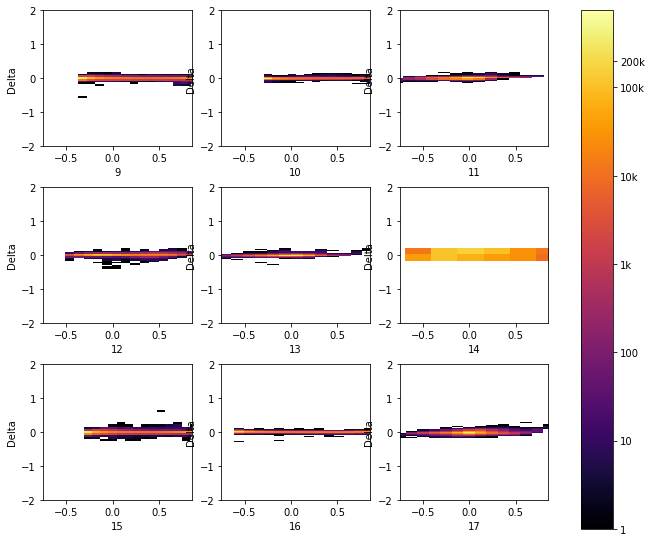

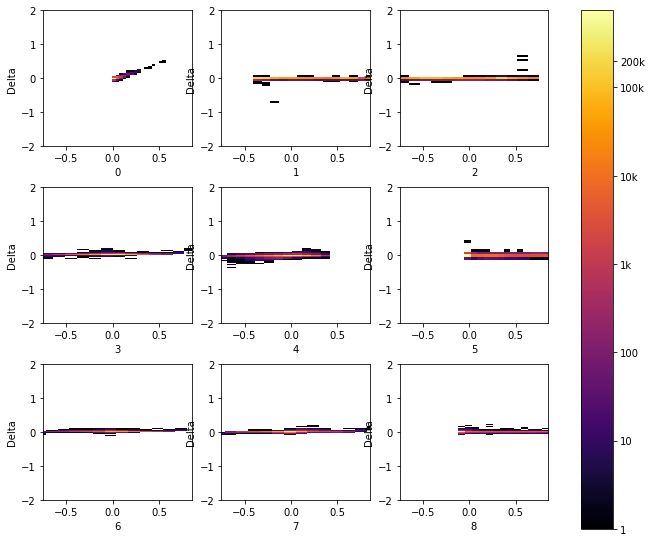

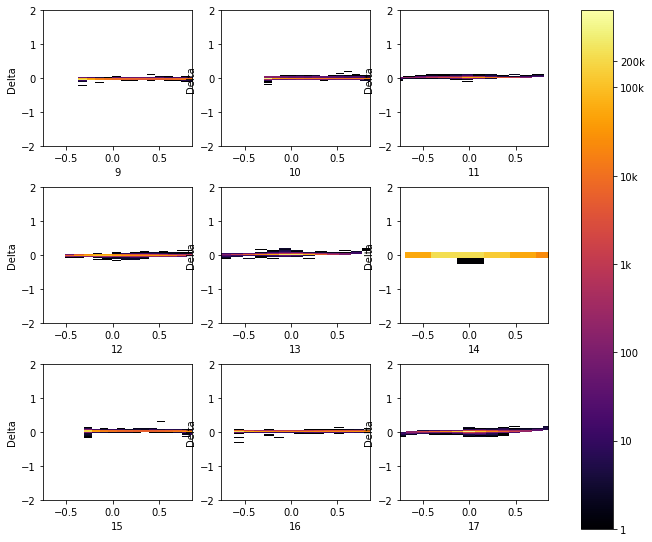

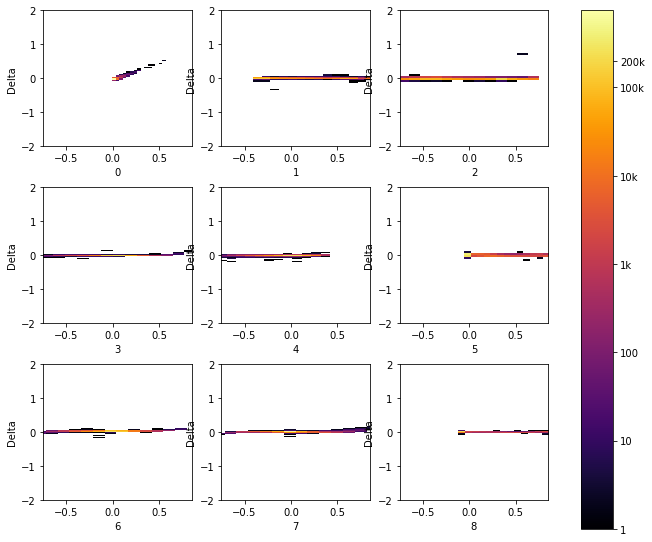

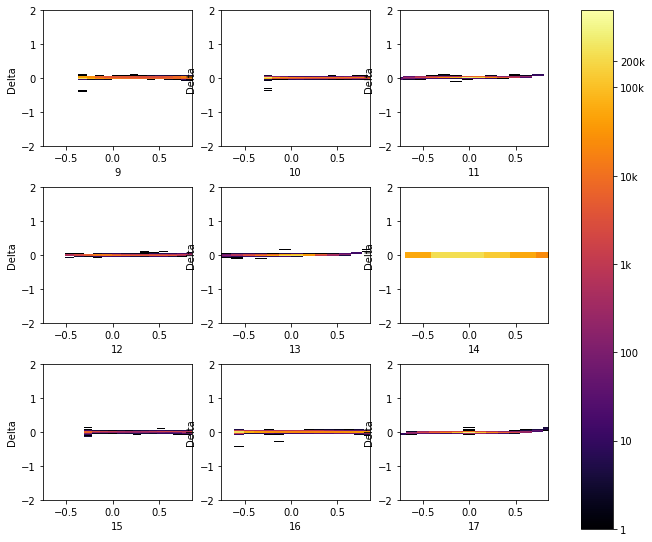

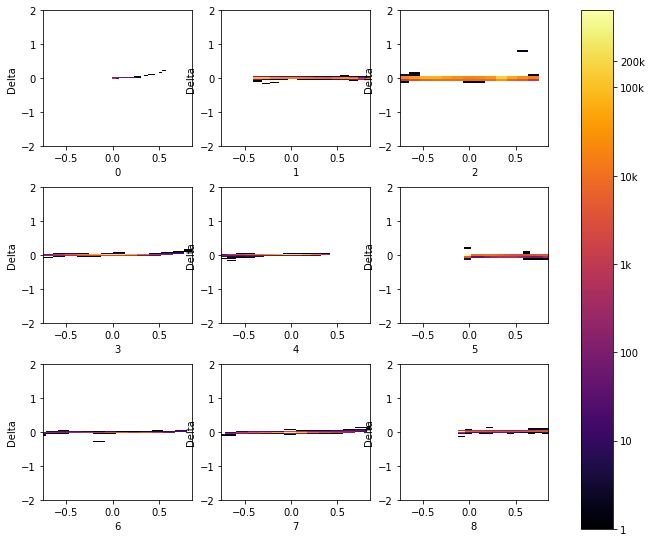

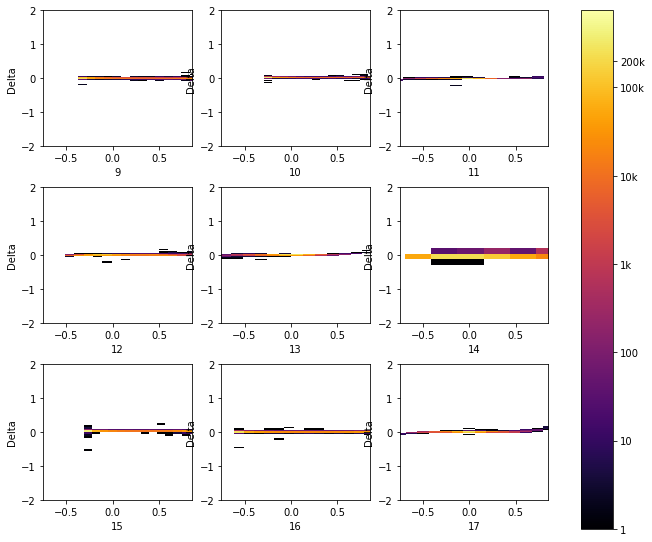

In [4]:
# The plots below show the difference between predictions to true scaled feature values 
# as a function of the true feature value. The closer the histograms are centered
# around the line y=0, the better the autoencoder has performed

l_minmax = [[-2, 2]] * 18 # The y limits
for encoding_dim in all_decoded_dict:
#for encoding_dim in [1]:
    plot_difference_displ(
        TYPE, pd.DataFrame(all_decoded_dict[encoding_dim]), pd.DataFrame(all_input), 
        encoding_dim, Transform=False, SetMinMax=True, FTS_SCLD=True, l_minmax=l_minmax
    )

In [7]:
"img/_{1}_orig_uncom_distribs_{0}.png".format(TYPE, encoding_dim)

'img/_1_orig_uncom_distribs_.png'

******************** 1 ********************


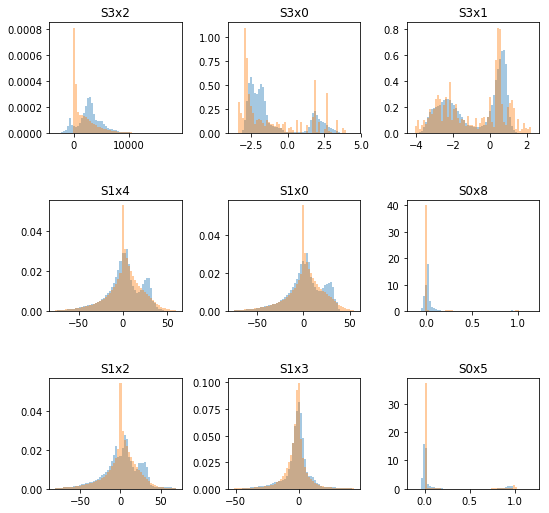

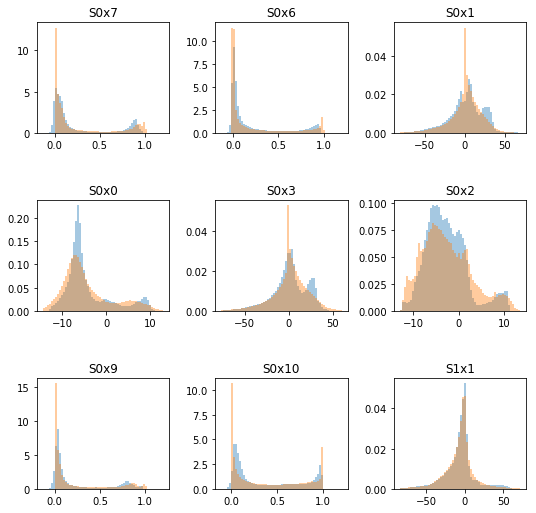

******************** 3 ********************


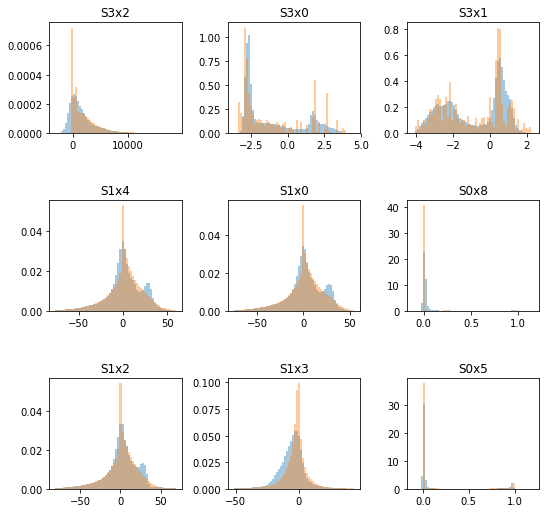

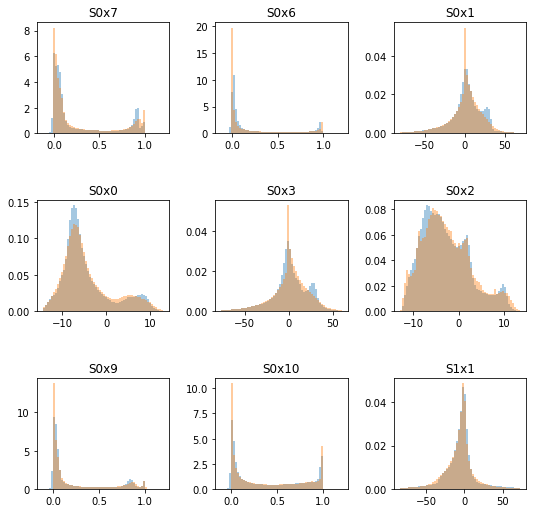

******************** 6 ********************


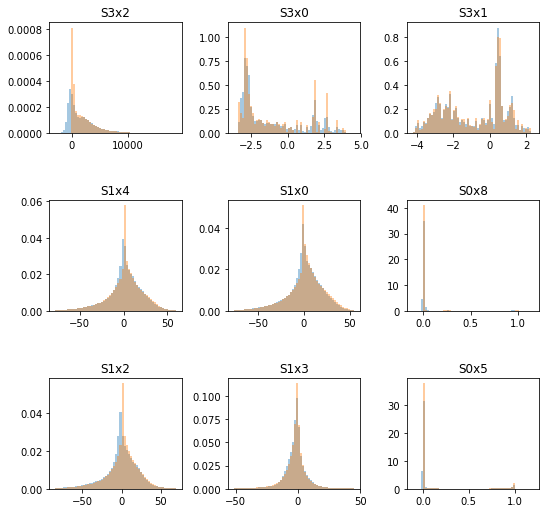

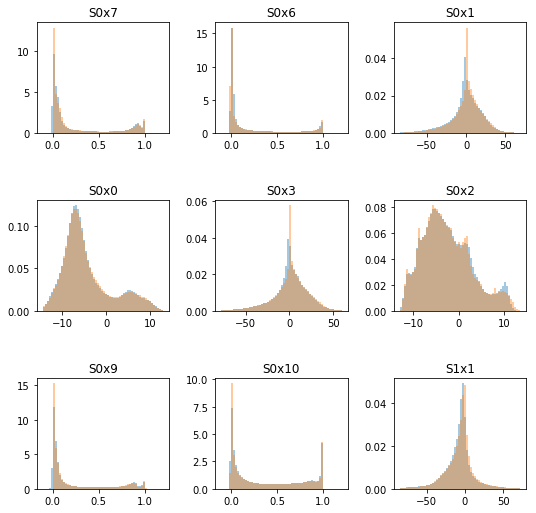

******************** 9 ********************


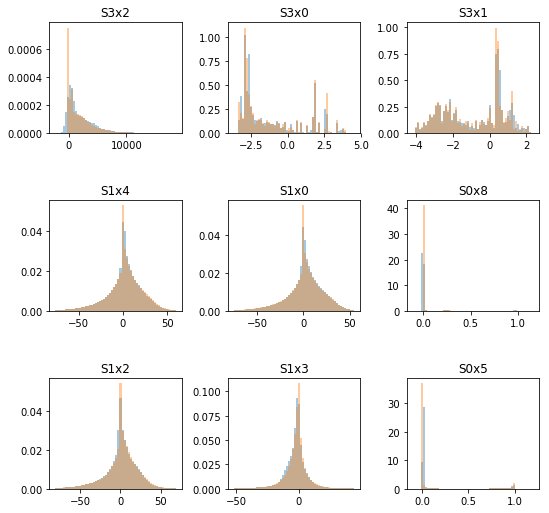

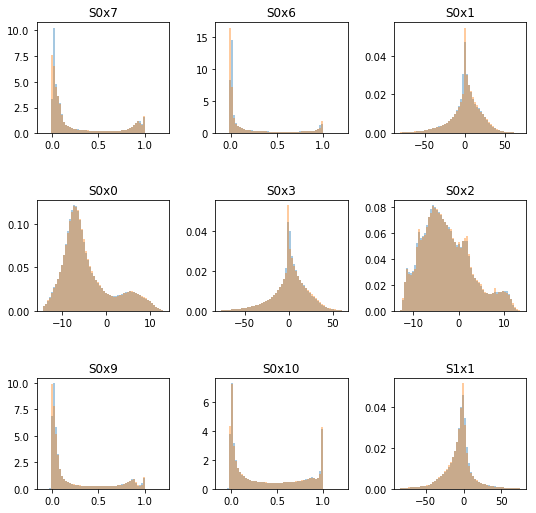

******************** 12 ********************


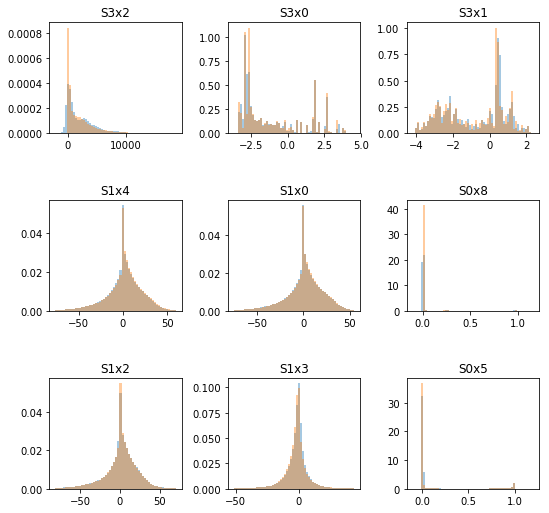

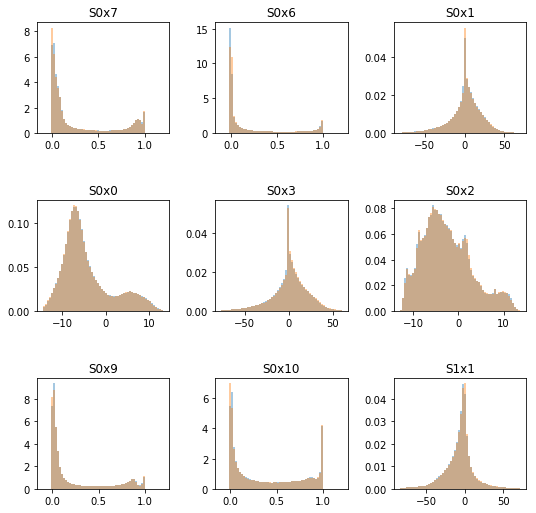

******************** 15 ********************


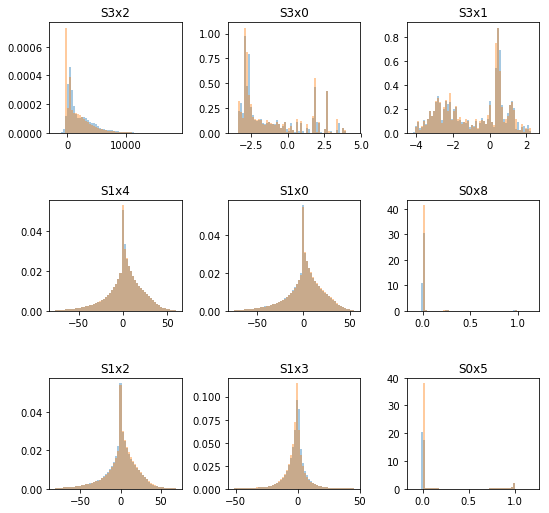

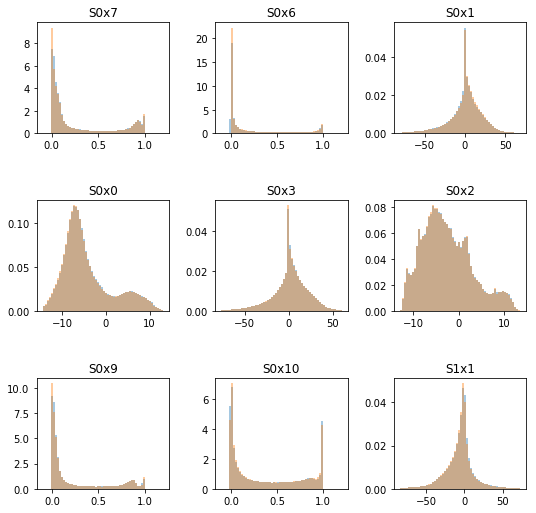

******************** 18 ********************


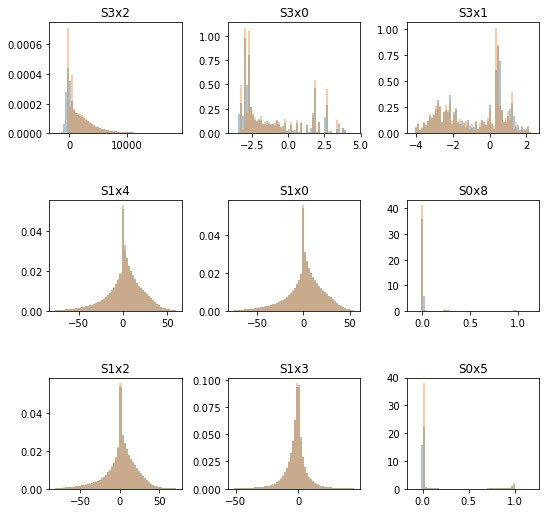

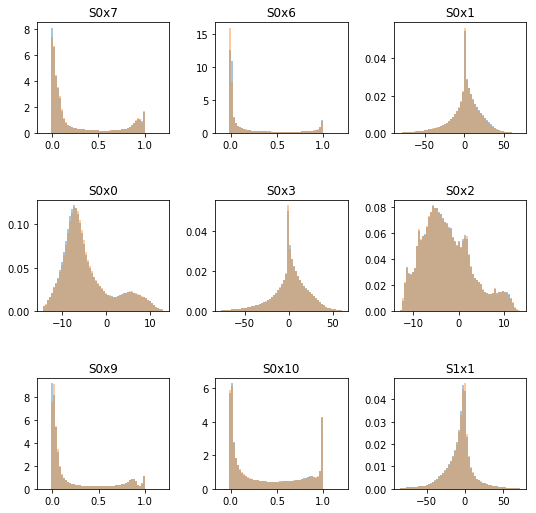

In [8]:
# The following plots show the orignal distributions in orange and the decoded distributions in blue.
# If the autoencoder has not lost a lot of information, these should lie on top of each other

rename_dict = {}
for i, e in enumerate(range(18)):
    rename_dict[e] = vars_list_input[i]
    
    
for encoding_dim in all_decoded_dict:
    # if you don't care about the names of the features uncomment the following line
#     print_features_histograms(
#         pd.DataFrame(all_decoded_dict_dec[encoding_dim]), 
#         target=pd.DataFrame(all_input_dec)
#     )
    print('*' * 20, encoding_dim, '*' * 20)
    
    df_temp = pd.DataFrame(all_decoded_dict_dec[encoding_dim])
    df_temp_input = pd.DataFrame(all_input_dec)

    df_temp.rename(columns=rename_dict, inplace=True)
    df_temp_input.rename(columns=rename_dict, inplace=True)

    print_features_histograms_displ(
        df_temp, target=df_temp_input, 
        save_filename="_{1}_orig_uncom_distribs_{0}.png".format(TYPE, encoding_dim)
    )
    plt.show()

In [9]:
l_encoding_dim = list(l_encoding_dim)

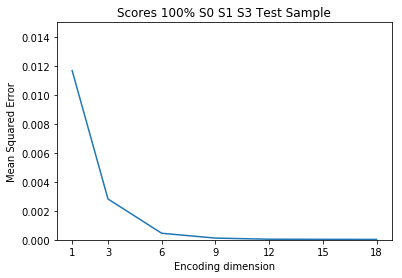

In [18]:
# Plotting the training loss (linear plot)
# The error stops decreasing dramatically after the encoding dimension is the number of independent variables.
plt.plot(l_encoding_dim, l_score)
plt.title("Scores 100% S0 S1 S3 Test Sample")
plt.xlabel("Encoding dimension")
plt.ylabel("Mean Squared Error")
plt.xticks(l_encoding_dim)
#plt.ylim(0, max(l_score)*1.2)
plt.ylim(0, 0.015)
plt.savefig("./img/scores_{}.png".format(TYPE))

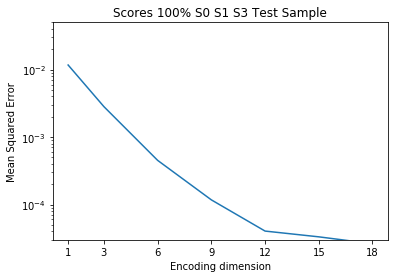

In [17]:
# Plotting the training loss (log plot)
# The error stops decreasing dramatically after the encoding dimension is the number of independent variables.
plt.semilogy(l_encoding_dim, l_score)
plt.title("Scores 100% S0 S1 S3 Test Sample")
plt.xlabel("Encoding dimension")
plt.ylabel("Mean Squared Error")
plt.xticks(l_encoding_dim)
#plt.ylim(0, max(l_score)*1.2)
plt.ylim(0.00003, 0.05)
plt.savefig("./img/scores_log_{}.png".format(TYPE))